# Suicide Rate Analysis

In [86]:
# Importing Libraries
import pandas as pd
import numpy as np

# Loading the data set

In [87]:
Suicide_Data = pd.read_csv(r"/Users/aruna/Downloads/Assignments/SCDA/WHO_Suicide_Data.csv")
Suicide_Data

,country,year,sex,age,suicides_no,population,gdp_for_year ($),Unnamed: 7,Unnamed: 8
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",NaN,NaN
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",NaN,NaN
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",NaN,NaN
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",NaN,NaN
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",NaN,NaN
...,...,...,...,...,...,...,...,...,...
27835,Belgium,2011,female,25-34 years,6,707535,"527,008,453,887",NaN,NaN
27836,Thailand,2016,male,75+ years,152,1124052,"411,755,164,833",NaN,NaN
27837,Netherlands,1998,female,15-24 years,21,934500,"432,476,116,419",NaN,NaN
27838,Grenada,2002,female,5-14 years,NaN,11760,"540,336,926",NaN,NaN


# Cleaning the DataSet

In [88]:
#Checking for null values
Suicide_Data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no            4265
population                0
 gdp_for_year ($)         0
Unnamed: 7            27840
Unnamed: 8            27838
dtype: int64

''' From the above observation we found there are few errors in the column names. As a part of data cleaning we are trying to fix those errors. Fristly, Removing white spaces from the column names '''

In [89]:
Suicide_Data.columns = Suicide_Data.columns.str.replace(' ', '')  

In [90]:
#Changing the names of the column
Suicide_Data.rename(columns={"gdp_for_year($)": "Gdp_per_yr_usd"}, inplace=True)

In [91]:
#Last two columns are having all NAN values, so we are Droppping unwanted columns
Suicide_Data.drop(['Unnamed:7' , 'Unnamed:8'],axis = 1, inplace = True) 
Suicide_Data

,country,year,sex,age,suicides_no,population,Gdp_per_yr_usd
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900"
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900"
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900"
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900"
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900"
...,...,...,...,...,...,...,...
27835,Belgium,2011,female,25-34 years,6,707535,"527,008,453,887"
27836,Thailand,2016,male,75+ years,152,1124052,"411,755,164,833"
27837,Netherlands,1998,female,15-24 years,21,934500,"432,476,116,419"
27838,Grenada,2002,female,5-14 years,NaN,11760,"540,336,926"


In [92]:
#Checking if there are any duplicate values
Suicide_Data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27835     True
27836     True
27837     True
27838     True
27839     True
Length: 27840, dtype: bool

In [93]:
#Dropping the above duplicate values
Suicide_Data.drop_duplicates(inplace= True)

In [94]:
#Changing the data type of object to int/float
Suicide_Data['suicides_no'] = Suicide_Data['suicides_no'].apply(pd.to_numeric, errors='coerce')

''' We are having NAN values in 'suicide_no' column. In order to fill the NAN values we are grouping the countries individually and calculating their mean based on 'suicide_no' column. Now we are filling the column with mean values using transform function '''

In [95]:
Suicide_Data['suicides_no'] = Suicide_Data['suicides_no'].fillna(Suicide_Data.groupby('country')['suicides_no'].transform('mean'))
Suicide_Data

,country,year,sex,age,suicides_no,population,Gdp_per_yr_usd
0,Albania,1987,male,15-24 years,21.0,312900,"2,156,624,900"
1,Albania,1987,male,35-54 years,16.0,308000,"2,156,624,900"
2,Albania,1987,female,15-24 years,14.0,289700,"2,156,624,900"
3,Albania,1987,male,75+ years,1.0,21800,"2,156,624,900"
4,Albania,1987,male,25-34 years,9.0,274300,"2,156,624,900"
...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,17.0,3620833,"63,067,077,179"
27816,Uzbekistan,2014,female,75+ years,9.0,348465,"63,067,077,179"
27817,Uzbekistan,2014,male,5-14 years,6.0,2762158,"63,067,077,179"
27818,Uzbekistan,2014,female,5-14 years,44.0,2631600,"63,067,077,179"


In [96]:
#In order to convert float values we are rounding off the mean with nearest zero value using ceil function.
Suicide_Data['suicides_no'] = Suicide_Data['suicides_no'].apply((np.ceil),inplace=True)

# Adding a new column “suicides/100k” and generating its data 

In [97]:
#Generating data for the new column 'suicides/100k' and filling its data accordingly
Suicide_Data['suicides/100k'] = Suicide_Data['suicides_no'] / (Suicide_Data['population'] / 100000) 
Suicide_Data

,country,year,sex,age,suicides_no,population,Gdp_per_yr_usd,suicides/100k
0,Albania,1987,male,15-24 years,21.0,312900,"2,156,624,900",6.711409
1,Albania,1987,male,35-54 years,16.0,308000,"2,156,624,900",5.194805
2,Albania,1987,female,15-24 years,14.0,289700,"2,156,624,900",4.832585
3,Albania,1987,male,75+ years,1.0,21800,"2,156,624,900",4.587156
4,Albania,1987,male,25-34 years,9.0,274300,"2,156,624,900",3.281079
...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,17.0,3620833,"63,067,077,179",0.469505
27816,Uzbekistan,2014,female,75+ years,9.0,348465,"63,067,077,179",2.582756
27817,Uzbekistan,2014,male,5-14 years,6.0,2762158,"63,067,077,179",0.217221
27818,Uzbekistan,2014,female,5-14 years,44.0,2631600,"63,067,077,179",1.671987


In [98]:
Suicide_Data['suicides/100k'] = Suicide_Data['suicides/100k'].apply((np.ceil),inplace=True)

# Adding a new column “gdp_per_capita” and filling its data.

Now generating another column 'gdp_per_capita' and filling the data accordingly
Before doing that we are removing the commas in the values

In [99]:
Suicide_Data['Gdp_per_yr_usd']=Suicide_Data['Gdp_per_yr_usd'].str.replace(',','')

Converting the column's data type

In [100]:
Suicide_Data['Gdp_per_yr_usd'] = Suicide_Data['Gdp_per_yr_usd'].apply(pd.to_numeric, errors='coerce')

we are grouping 'country' and 'year'individually and calculating their mean based on 'population' column.
Now we are generating a new column 'populationByYear' and filling the column with sum values using transform function.

In [101]:
Suicide_Data['PopulationByYear' ] = Suicide_Data.groupby(['country','year' ])['population'].transform('sum')
Suicide_Data

,country,year,sex,age,suicides_no,population,Gdp_per_yr_usd,suicides/100k,PopulationByYear
0,Albania,1987,male,15-24 years,21.0,312900,2156624900,7.0,2709600
1,Albania,1987,male,35-54 years,16.0,308000,2156624900,6.0,2709600
2,Albania,1987,female,15-24 years,14.0,289700,2156624900,5.0,2709600
3,Albania,1987,male,75+ years,1.0,21800,2156624900,5.0,2709600
4,Albania,1987,male,25-34 years,9.0,274300,2156624900,4.0,2709600
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,17.0,3620833,63067077179,1.0,27313507
27816,Uzbekistan,2014,female,75+ years,9.0,348465,63067077179,3.0,27313507
27817,Uzbekistan,2014,male,5-14 years,6.0,2762158,63067077179,1.0,27313507
27818,Uzbekistan,2014,female,5-14 years,44.0,2631600,63067077179,2.0,27313507


Now we are filling our new column with newly generated population based on each year

In [102]:
Suicide_Data['gdp_per_capita'] = Suicide_Data['Gdp_per_yr_usd'] / (Suicide_Data['PopulationByYear'])
Suicide_Data

,country,year,sex,age,suicides_no,population,Gdp_per_yr_usd,suicides/100k,PopulationByYear,gdp_per_capita
0,Albania,1987,male,15-24 years,21.0,312900,2156624900,7.0,2709600,795.920025
1,Albania,1987,male,35-54 years,16.0,308000,2156624900,6.0,2709600,795.920025
2,Albania,1987,female,15-24 years,14.0,289700,2156624900,5.0,2709600,795.920025
3,Albania,1987,male,75+ years,1.0,21800,2156624900,5.0,2709600,795.920025
4,Albania,1987,male,25-34 years,9.0,274300,2156624900,4.0,2709600,795.920025
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,17.0,3620833,63067077179,1.0,27313507,2309.006939
27816,Uzbekistan,2014,female,75+ years,9.0,348465,63067077179,3.0,27313507,2309.006939
27817,Uzbekistan,2014,male,5-14 years,6.0,2762158,63067077179,1.0,27313507,2309.006939
27818,Uzbekistan,2014,female,5-14 years,44.0,2631600,63067077179,2.0,27313507,2309.006939


# Ranking each country by total number of suicides

Performing groupby operation on'country' and 'suicides_no' is summed up for each country using the sum method and a new dataFrame is created.
reset_index() is to convert new column object with a new index.
The new DataFrame has two columns: 'country' and 'suicides_no', where 'suicides_no' has total number of suicides for each country.

In [103]:
grouped = Suicide_Data.groupby('country')['suicides_no'].sum().reset_index()

To find the rank we are Sorting the dataframe in descending order.

In [104]:
ranked = grouped.sort_values('suicides_no', ascending=False).reset_index(drop=True)

# Printing the dataframe with ranks
print(ranked)

                   country  suicides_no
0       Russian Federation     815965.0
1            United States     759837.0
2                    Japan     635785.0
3                   France     240432.0
4                  Ukraine     237879.0
..                     ...          ...
96              Cabo Verde         57.0
97                   Macau         36.0
98              San Marino         36.0
99   Saint Kitts and Nevis          0.0
100               Dominica          0.0

[101 rows x 2 columns]


# Generating a new column 'BirthYear' 

In [105]:
#Chceking for unique age group values
Suicide_Data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

We have total 6 age groups. We need to replace them with either lower or higher values of the range.
Generating a new column 'BirthYear' and filling the values accordingly

In [106]:
a = 'age'
ages = [ Suicide_Data['age'] == '15-24 years', Suicide_Data['age'] == '35-54 years', Suicide_Data['age'] == '75+ years', Suicide_Data['age'] == '25-34 years',Suicide_Data['age'] == '55-74 years',Suicide_Data['age'] == '5-14 years' ]
lowerAge = [ 15, 35, 75, 25, 55, 5 ]
    
Suicide_Data["age_lower"] = np.select(ages, lowerAge, default=np.nan)

Suicide_Data["BirthYear"] = Suicide_Data['year'] - Suicide_Data['age_lower']

Suicide_Data


,country,year,sex,age,suicides_no,population,Gdp_per_yr_usd,suicides/100k,PopulationByYear,gdp_per_capita,age_lower,BirthYear
0,Albania,1987,male,15-24 years,21.0,312900,2156624900,7.0,2709600,795.920025,15.0,1972.0
1,Albania,1987,male,35-54 years,16.0,308000,2156624900,6.0,2709600,795.920025,35.0,1952.0
2,Albania,1987,female,15-24 years,14.0,289700,2156624900,5.0,2709600,795.920025,15.0,1972.0
3,Albania,1987,male,75+ years,1.0,21800,2156624900,5.0,2709600,795.920025,75.0,1912.0
4,Albania,1987,male,25-34 years,9.0,274300,2156624900,4.0,2709600,795.920025,25.0,1962.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,17.0,3620833,63067077179,1.0,27313507,2309.006939,35.0,1979.0
27816,Uzbekistan,2014,female,75+ years,9.0,348465,63067077179,3.0,27313507,2309.006939,75.0,1939.0
27817,Uzbekistan,2014,male,5-14 years,6.0,2762158,63067077179,1.0,27313507,2309.006939,5.0,2009.0
27818,Uzbekistan,2014,female,5-14 years,44.0,2631600,63067077179,2.0,27313507,2309.006939,5.0,2009.0


# Adding a new column “generation” and fill up its data according

In [107]:
generations = {'Lost Generation': (1883, 1900),'G.I. Generation': (1901, 1927),'Silent': (1928, 1945),'Boomers': (1946, 1964),'Generation X': (1965, 1980), 'Millennials': (1981, 1996), 'Generation Z': (1997, 2012),'Generation A': (2013, 2025)}

# Create a new column named "generation" filled with NaN values
Suicide_Data['generation'] = np.nan

# Filling up "generation" column based on the 'BirthYear' of each row
for index, row in Suicide_Data.iterrows():
    for generation, value in generations.items():
        if value[0]<= row['BirthYear']<= value[1]:
            Suicide_Data.at[index,'generation'] = generation

In [108]:
Suicide_Data

,country,year,sex,age,suicides_no,population,Gdp_per_yr_usd,suicides/100k,PopulationByYear,gdp_per_capita,age_lower,BirthYear,generation
0,Albania,1987,male,15-24 years,21.0,312900,2156624900,7.0,2709600,795.920025,15.0,1972.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,2156624900,6.0,2709600,795.920025,35.0,1952.0,Boomers
2,Albania,1987,female,15-24 years,14.0,289700,2156624900,5.0,2709600,795.920025,15.0,1972.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,2156624900,5.0,2709600,795.920025,75.0,1912.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,2156624900,4.0,2709600,795.920025,25.0,1962.0,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,17.0,3620833,63067077179,1.0,27313507,2309.006939,35.0,1979.0,Generation X
27816,Uzbekistan,2014,female,75+ years,9.0,348465,63067077179,3.0,27313507,2309.006939,75.0,1939.0,Silent
27817,Uzbekistan,2014,male,5-14 years,6.0,2762158,63067077179,1.0,27313507,2309.006939,5.0,2009.0,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44.0,2631600,63067077179,2.0,27313507,2309.006939,5.0,2009.0,Generation Z


# Calculating correlations between suicides, GDP per capita and population

In [109]:
#Calculating correlations between the below columns
C = Suicide_Data[['suicides_no','gdp_per_capita','population']].corr()
print(C)   

                suicides_no  gdp_per_capita  population
suicides_no        1.000000        0.060545    0.545661
gdp_per_capita     0.060545        1.000000    0.081049
population         0.545661        0.081049    1.000000


In [110]:
#To represent correlation in graphical foramt i'm using heat map here
data_corr = Suicide_Data[['suicides_no','gdp_per_capita', 'population']]

# Creating a heatmap for correlations

In [111]:
#imporitng libraries 
import seaborn as sns
import matplotlib.pyplot as plt

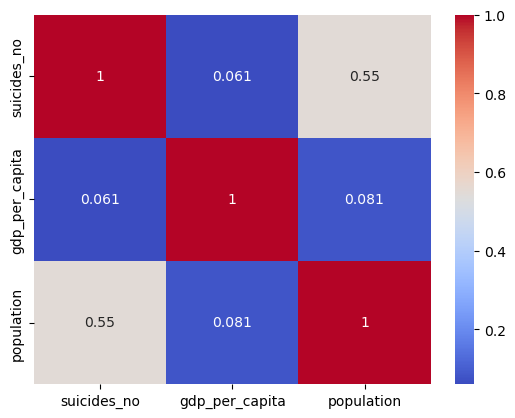

In [112]:
#Creating heatmap
sns.heatmap(C, annot=True, cmap='coolwarm')
plt.show()

# Scatter plots for each pair of variables

Creating a scatter plot matrix which shows all possible pairs of variables.

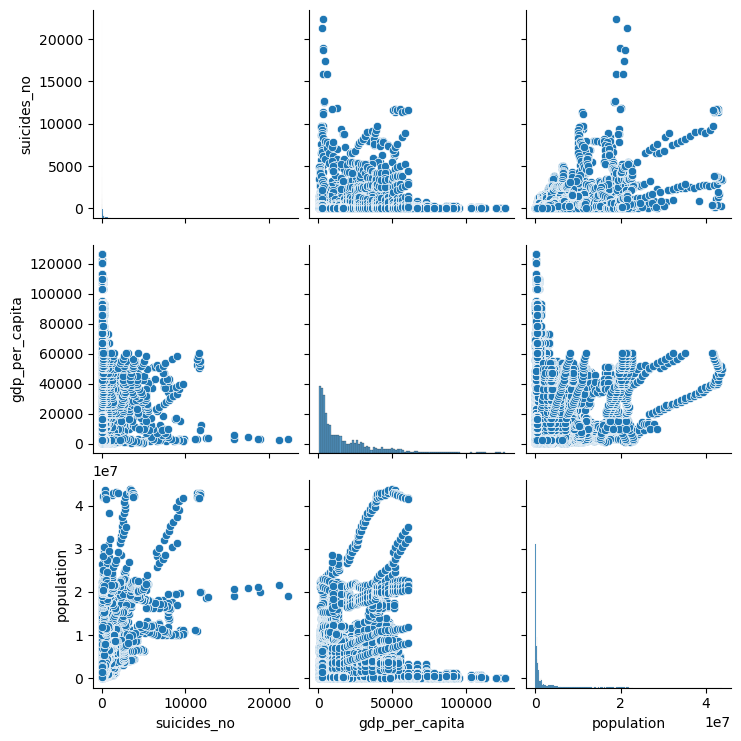

In [113]:
sns.pairplot(Suicide_Data[['suicides_no', 'gdp_per_capita', 'population']])
plt.show()

# visualise total suicides over years

Creating a new dataFrame with the total suicides over year
For that we will groupby 'year' and 'suicides_no' is summed up. 
DataFrame has 'year' and 'suicides_no' which contains the total number of suicides per each year

In [114]:
SuicidesPerYear = Suicide_Data.groupby('year')['suicides_no'].sum().reset_index()

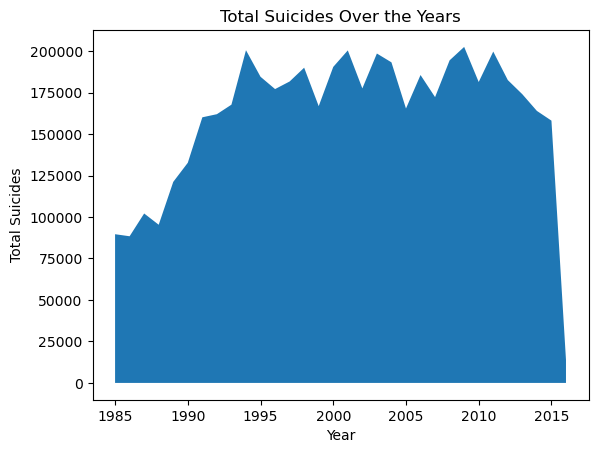

In [115]:
import matplotlib.pyplot as plt

plt.fill_between(SuicidesPerYear['year'], SuicidesPerYear['suicides_no'])
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.title('Total Suicides Over the Years')

plt.show()

# Compare suicides by gender over years

In [116]:
###Interactive visualisation
import plotly.graph_objs as go
import plotly.express as px

In [117]:
#Creating a new DataFrame with total no.of suicides by gender and year
Gender_Year = Suicide_Data.groupby(['year', 'sex'])['suicides_no'].sum().reset_index()

In [120]:
#Creating a line chart having separate lines for male, female 
fig = px.line(Gender_Year, y='year', x='suicides_no', color='sex')

fig.update_layout(title='Total Suicides by Gender & Years', xaxis_title='Total No.Of Suicides', yaxis_title='year')

fig.show()

# Calculating and Visualising suicides on generation and on age group.

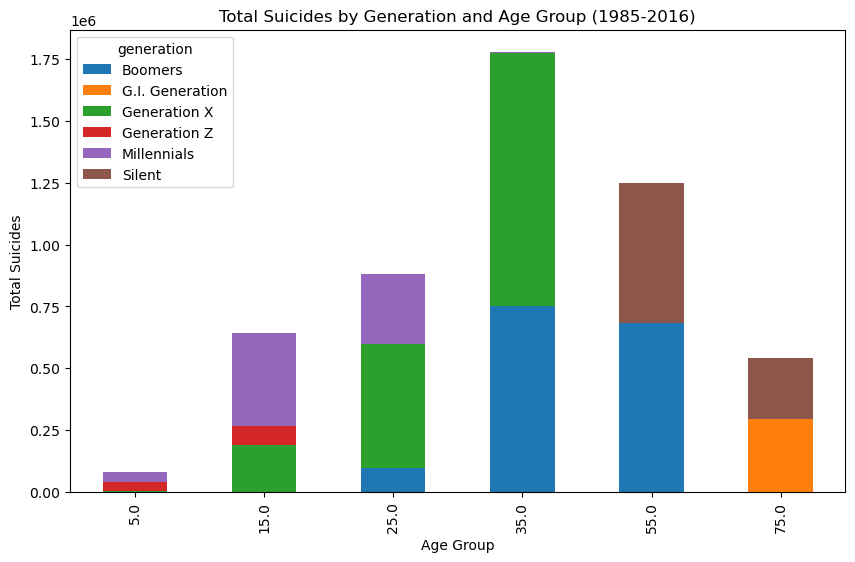

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate suicides by generation and age group
SuicidesByGenAge = Suicide_Data.groupby(['generation', 'age_lower'])['suicides_no'].sum().reset_index()

# Creating a stacked bar chart of suicides by generation and age group
fig, ax = plt.subplots(figsize=(10, 6))
SuicidesByGenAge.pivot(index='age_lower', columns='generation', values='suicides_no').plot(kind='bar', stacked=True, ax=ax)

# Chart title, axis labels
ax.set_title('Total Suicides by Generation and Age Group (1985-2016)')
ax.set_xlabel('Age Group')
ax.set_ylabel('Total Suicides')

plt.show()
